In [1]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, TimestampType, StringType
from pyspark.sql.window import Window
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

# spark initialization
spark = SparkSession.builder.appName("gamedata").getOrCreate()
# load master database
hard_sales = spark.read.parquet("../database/parquet/hard_sales")
# hard_info_df = spark.read.parquet("../database/parquet/hard_info")

23/04/01 15:16:14 WARN Utils: Your hostname, apricot.local resolves to a loopback address: 127.0.0.1; using 192.168.0.42 instead (on interface en0)
23/04/01 15:16:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/01 15:16:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/01 15:16:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/04/01 15:16:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
ps_launch_df = hard_sales.groupBy("delta_week").pivot("hw").sum("sum_units").sort("delta_week").select(
    "delta_week",
    "PS5", "PS4", "PS3"
)

In [3]:
ps_launch_df.show()

23/04/01 15:16:18 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+----------+------+------+------+
|delta_week|   PS5|   PS4|   PS3|
+----------+------+------+------+
|         0|118085|322083| 88443|
|         1|160976|374780|131821|
|         2|201435|405546|169082|
|         3|213328|434410|199549|
|         4|224384|467751|243146|
|         5|241962|491889|313703|
|         6|255150|506925|390209|
|         7|265782|518978|466715|
|         8|276946|532012|534335|
|         9|284274|542141|567827|
|        10|301622|553833|593206|
|        11|327570|562513|614234|
|        12|341094|569400|634921|
|        13|363984|576787|657871|
|        14|389021|583653|678488|
|        15|422859|591663|700046|
|        16|445408|599014|746970|
|        17|483259|605541|773895|
|        18|517916|613785|793682|
|        19|580211|620896|812073|
+----------+------+------+------+
only

In [4]:
ps_launch = ps_launch_df.toPandas().set_index("delta_week")

<Axes: xlabel='delta_week'>

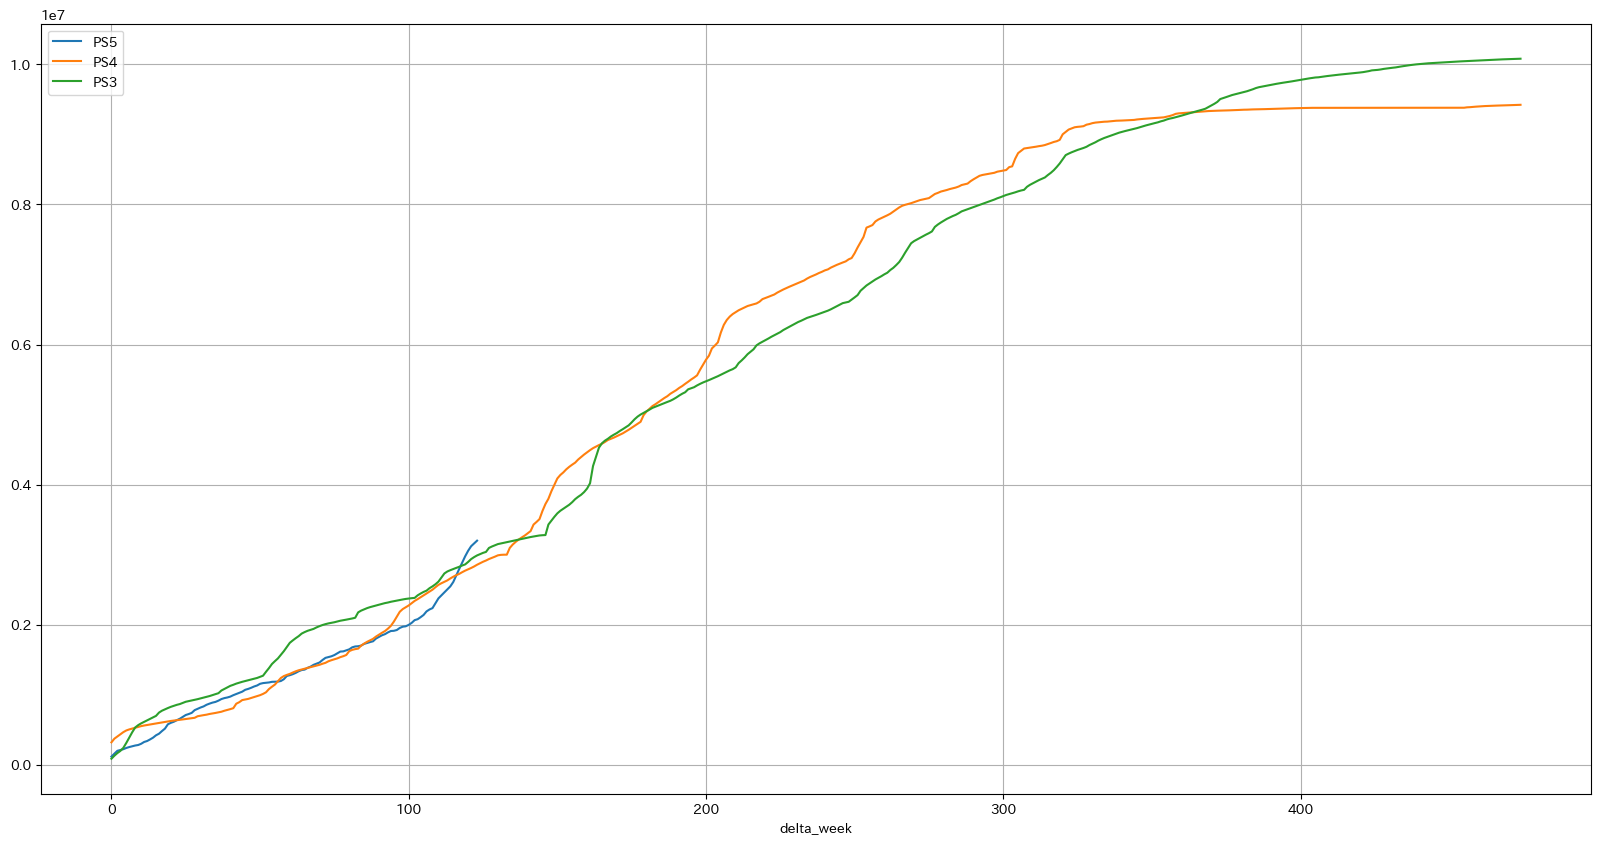

In [5]:
ps_launch.plot(figsize=(20, 10), grid=True)

In [6]:
ps5_launch_df = ps_launch_df.filter(F.col("PS5").isNotNull())

<Axes: xlabel='delta_week'>

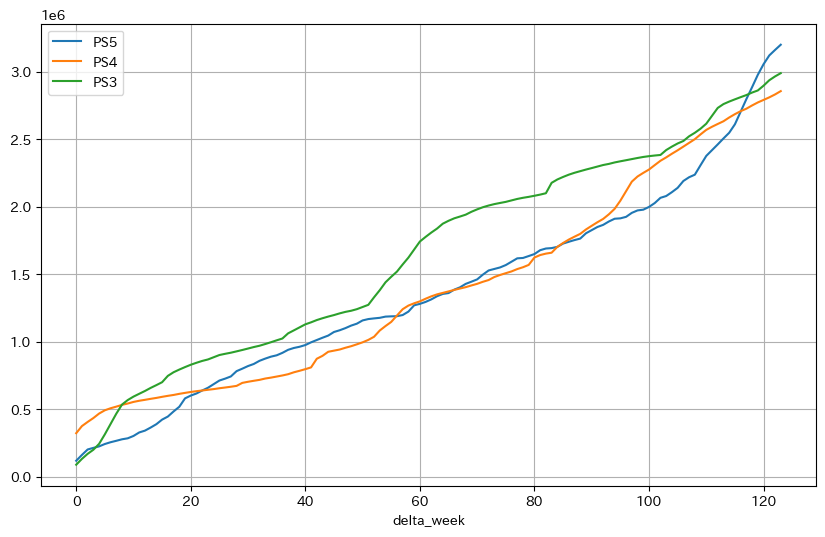

In [7]:
ps5_launch = ps5_launch_df.toPandas().set_index("delta_week")
ps5_launch.plot(figsize=(10, 6), grid=True)

In [8]:
ps5_launch_df.filter(F.col("delta_week") > 80).orderBy(F.col("delta_week")).show()

+----------+-------+-------+-------+
|delta_week|    PS5|    PS4|    PS3|
+----------+-------+-------+-------+
|        81|1678528|1642512|2090505|
|        82|1690968|1653070|2100614|
|        83|1694003|1659863|2177822|
|        84|1703184|1703235|2202656|
|        85|1727545|1731832|2221333|
|        86|1740906|1757182|2238287|
|        87|1753451|1778744|2252295|
|        88|1764645|1799594|2264262|
|        89|1803981|1832187|2276156|
|        90|1827281|1859337|2287081|
|        91|1850581|1885809|2298433|
|        92|1866236|1910325|2309785|
|        93|1891345|1944691|2318074|
|        94|1911637|1984980|2328875|
|        95|1914501|2045310|2337365|
|        96|1925681|2115906|2345415|
|        97|1955203|2186502|2353640|
|        98|1973279|2224788|2361946|
|        99|1978825|2251446|2369481|
|       100|1999122|2276271|2375380|
+----------+-------+-------+-------+
only showing top 20 rows



In [9]:
hard_sales.filter(F.col("hw") == "PS4").filter(F.col("delta_week").isin([88, 89, 90, 91,92,93,94,95,96,97])).show()

+---+----------+----------+-----+----+-----+----------+-----+------------+-----------+---------+----------+----------+---------+----+
| hw|begin_date|  end_date|units|year|month|launch_day|maker|   full_name|launch_year|delta_day|delta_week|delta_year|sum_units|week|
+---+----------+----------+-----+----+-----+----------+-----+------------+-----------+---------+----------+----------+---------+----+
|PS4|2015-10-26|2015-11-01|20850|2015|   11|2014-02-22| SONY|PlayStation4|       2014|      617|        88|         1|  1799594|  44|
|PS4|2015-11-02|2015-11-08|32593|2015|   11|2014-02-22| SONY|PlayStation4|       2014|      624|        89|         1|  1832187|  45|
|PS4|2015-11-09|2015-11-15|27150|2015|   11|2014-02-22| SONY|PlayStation4|       2014|      631|        90|         1|  1859337|  46|
|PS4|2015-11-16|2015-11-22|26472|2015|   11|2014-02-22| SONY|PlayStation4|       2014|      638|        91|         1|  1885809|  47|
|PS4|2015-11-23|2015-11-29|24516|2015|   11|2014-02-22| SONY|P

In [10]:
hard_sales.filter(F.col("hw") == "PS5").filter(F.col("delta_week").isin([88, 89, 90, 91])).show()

+---+----------+----------+-----+----+-----+----------+-----+------------+-----------+---------+----------+----------+---------+----+
| hw|begin_date|  end_date|units|year|month|launch_day|maker|   full_name|launch_year|delta_day|delta_week|delta_year|sum_units|week|
+---+----------+----------+-----+----+-----+----------+-----+------------+-----------+---------+----------+----------+---------+----+
|PS5|2022-07-18|2022-07-24|11194|2022|    7|2020-11-12| SONY|PlayStation5|       2020|      619|        88|         2|  1764645|  29|
|PS5|2022-07-25|2022-07-31|39336|2022|    7|2020-11-12| SONY|PlayStation5|       2020|      626|        89|         2|  1803981|  30|
|PS5|2022-08-01|2022-08-07|23300|2022|    8|2020-11-12| SONY|PlayStation5|       2020|      633|        90|         2|  1827281|  31|
|PS5|2022-08-08|2022-08-14|23300|2022|    8|2020-11-12| SONY|PlayStation5|       2020|      640|        91|         2|  1850581|  32|
+---+----------+----------+-----+----+-----+----------+-----+-

In [11]:
'''
plotの有効そうなオプション

xticks sequence
Values to use for the xticks.
yticks sequence
Values to use for the yticks.
xlim 2-tuple/list
Set the x limits of the current axes.
ylim 2-tuple/list
Set the y limits of the current axes.
'''



'\nplotの有効そうなオプション\n\nxticks sequence\nValues to use for the xticks.\nyticks sequence\nValues to use for the yticks.\nxlim 2-tuple/list\nSet the x limits of the current axes.\nylim 2-tuple/list\nSet the y limits of the current axes.\n'

In [12]:
xticks_list=[]
for y in range(0, 3500, 500):
    xticks_list.append(y)
xticks_list.append(936)
xticks_list.append(1027)
xticks_list = sorted(xticks_list)

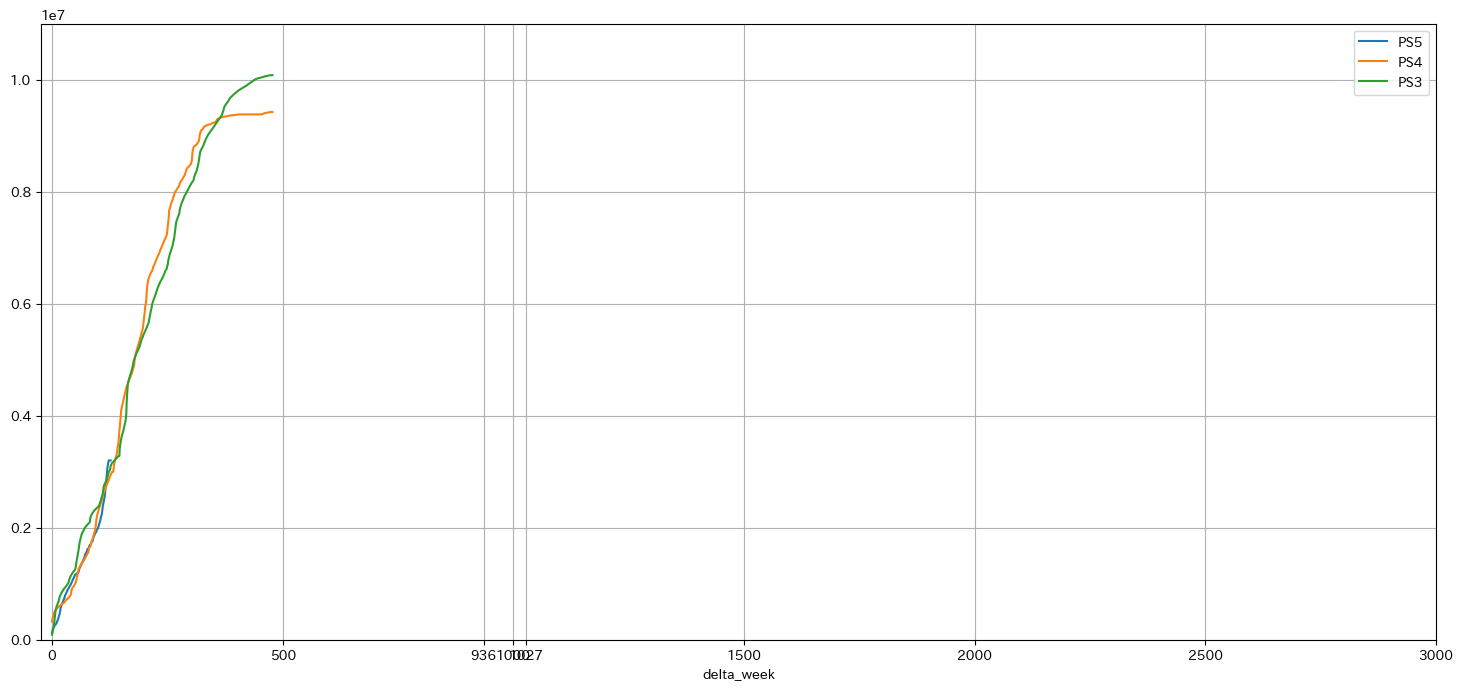

In [13]:
ps_launch.interpolate(method="linear", limit=4).plot(figsize=(18, 8),
                                                     grid=True, 
                                                     ylim=[0, 11000000],
                                                     xticks=xticks_list
                                                    )
plt.savefig('ps_lifetime.png')

In [14]:
plt.close('all')

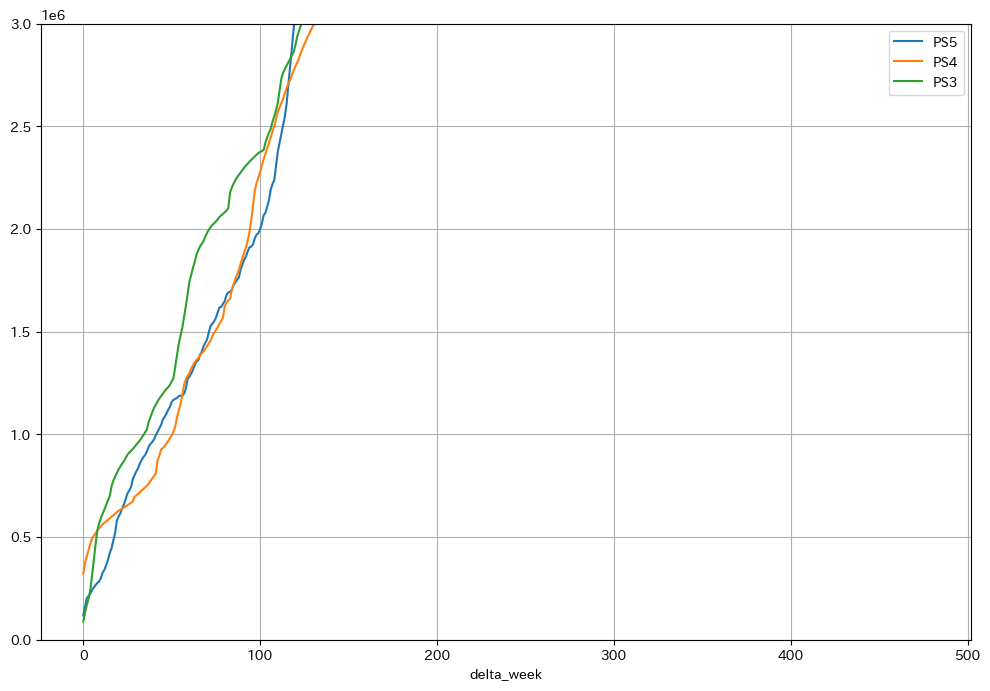

In [15]:
ps_launch_500 = ps_launch[ps_launch.index <= 580]
ps_launch_500.interpolate(method="linear", limit=4).plot(figsize=(12, 8),
                                                     grid=True, 
                                                     ylim=[0, 3000000])
plt.savefig('ps_earlydays.png')

In [16]:
plt.close('all')


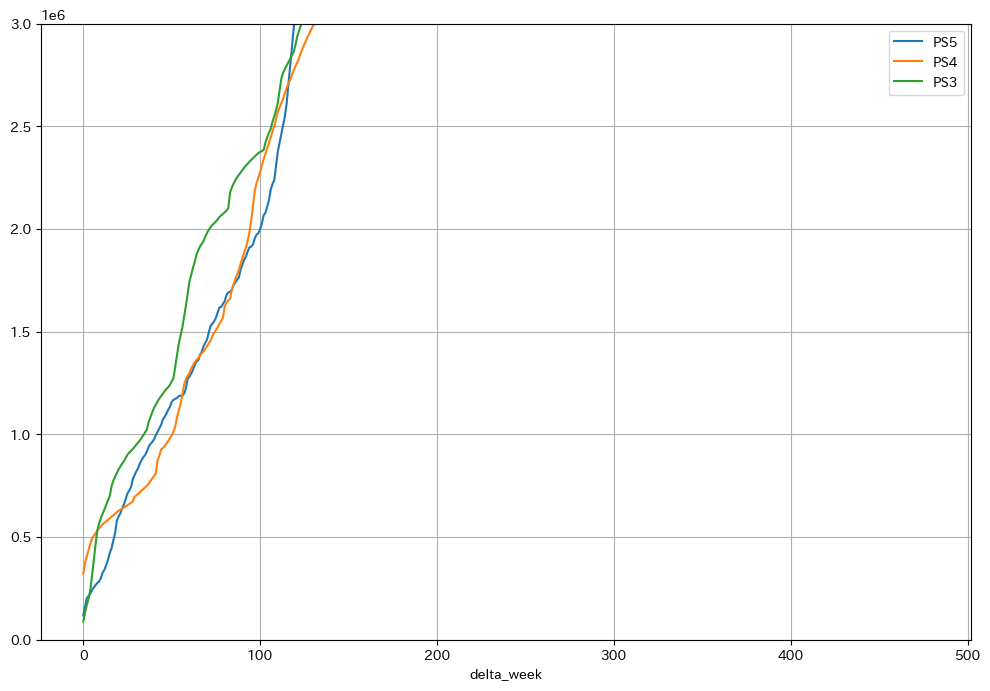

In [17]:
ps_launch_800 = ps_launch[ps_launch.index <= 800]
ps_launch_800.interpolate(method="linear", limit=4).plot(figsize=(12, 8),
                                                     grid=True, 
                                                     ylim=[0, 3000000])
plt.savefig('ps_nearfuture.png')

In [18]:
plt.close('all')


In [19]:
datetime.date(2017, 7, 29) - datetime.date(2014,2,22)

datetime.timedelta(days=1253)

In [20]:
datetime.date(2016, 9, 15) - datetime.date(2014,2,22)

datetime.timedelta(days=936)

In [21]:
datetime.date(2020, 11, 12) + datetime.timedelta(1000)
# スリム期待時期

datetime.date(2023, 8, 9)

In [22]:
datetime.datetime(2006, 11, 11) + datetime.timedelta(360)
# PS3 急上昇  なぞ

datetime.datetime(2007, 11, 6, 0, 0)

In [23]:
datetime.datetime(2009, 9, 3) - datetime.datetime(2006, 11, 11)
# PS3 slim発売

datetime.timedelta(days=1027)

In [24]:
datetime.datetime(2011, 8, 18) - datetime.datetime(2006, 11, 11)
# PS3値下げ

datetime.timedelta(days=1741)

In [25]:
datetime.date(2015, 9, 2) - datetime.date(2014, 2, 22)  # MGSV ファントムペイン

datetime.timedelta(days=557)

In [26]:
psw_launch = launch_sum[['PS4', 'PS5', 'PS3', 'Switch']].dropna(how="all")
psw_launch.interpolate(method="linear", limit=2).plot(figsize=(13, 8), grid=True, ylim=[0, 26000000])
plt.savefig('ps_switch.png')

NameError: name 'launch_sum' is not defined

23/04/02 01:46:14 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 350304 ms exceeds timeout 120000 ms
23/04/02 01:46:14 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/02 01:46:22 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

In [ ]:
plt.close('all')


In [ ]:
psw_launch["Switch"].dropna()

23/03/24 23:15:54 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 908517 ms exceeds timeout 120000 ms
23/03/24 23:15:54 WARN SparkContext: Killing executors is not supported by current scheduler.
